In [2]:
def classificateWithNumbersThreeTarget(value):
    target=0
    if(value>=0.0015):
        target=1
    elif(value<=-0.0015):
        target=-1
    else:
        target=0
    return target


def split_sequence_modified(sequence, n_steps_in):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        # check if we are beyond the sequence
        if end_ix+5 > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sum(sequence[end_ix:end_ix+5])
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def graph(test_y,yhat,mennyiseg):
    valos=test_y[:mennyiseg]
    predikt=yhat[:mennyiseg]
    valos = pd.DataFrame(valos, columns=['Real'])
    predikt = pd.DataFrame(predikt, columns=['Predicted'])
    merge=valos.join(predikt)
    
    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge, linewidth=3)
    plt.show()

def correlation_heatmap(df):
    import matplotlib.pyplot as plt
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(40,40))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.1, annot=True, cbar_kws={"shrink": .7})
    sns.set(font_scale=2)
    plt.show();
    
    
    
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metrikak(y_true,y_pred):
    print(mean_squared_error(y_true,y_pred))
    print(mean_absolute_percentage_error(y_true,y_pred))
from numpy import hstack
import array
from numpy import array
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def percentChange(lastValue,secondLastValue):
        return round((float(lastValue)-secondLastValue)/abs(secondLastValue),6)


def kirajzoltatas(yhat,test_y):
    yhat = pd.DataFrame(yhat, columns=['Predicted'])
    test_y2 = pd.DataFrame(test_y, columns=['Real'])
    merge=test_y2.join(yhat)

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(30,20))
    sns.lineplot(data=merge[:100], linewidth=3)
    plt.show()

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)



tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
    
data1 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_06', sep=",", header=None)
data1.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

data2 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_07', sep=",", header=None)
data2.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

data3 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_08', sep=",", header=None)
data3.columns = ["time", "open", "high", "low","close","volume",'drop1','drop2']

data4 = pd.read_csv('/home/balazs/Desktop/adathalmazok/btc_2012-2021/btc_split_data_part_09', sep=",", header=None)
data4.columns = ["time", "open", "high", "low","close","volume"]

data= pd.concat([data1,data2,data3,data4], axis=0)
#data=data4.dropna()
data=data[['time','open','high','low','close','volume']]
data=data.dropna()
#data

#data=data4
    

Setup Complete


2021-10-28 12:31:07.986828: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-28 12:31:07.986872: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data

,time,open,high,low,close,volume
0,1505706180,3761.68,3775.45,3761.66,3775.32,1.281182
1,1505706240,3769.29,3769.84,3768.89,3769.84,1.352133
2,1505706300,3772.93,3773.01,3772.93,3773.01,0.196074
3,1505706360,3772.94,3783.34,3772.91,3783.34,3.777993
4,1505706420,3783.34,3787.10,3783.27,3786.70,0.138679
...,...,...,...,...,...,...
357373,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487
357374,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848
357375,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682
357376,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415


In [3]:
data['dates'] = pd.to_datetime(data['time'], unit='s')

In [4]:
data4.isnull().sum().sum()

12695

In [5]:
correlation_heatmap(data)

# sima árat (tanitás)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
required_features = ['open','high','low']
output_label = 'close'

In [52]:
x_train, x_test, y_train, y_test = train_test_split(
data[required_features],
data[output_label],
test_size = 0.3
)

In [53]:
x_train

,open,high,low
125827,12256.23,12263.44,12256.23
104936,10719.06,10727.04,10717.58
7259,11162.25,11165.15,11158.48
94275,10740.88,10743.65,10735.85
199614,17816.16,17817.71,17804.79
...,...,...,...
164168,16799.47,16813.82,16795.07
319582,48503.91,48518.47,48366.77
224046,26870.48,26886.85,26863.97
153948,15143.16,15143.16,15125.76


In [54]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [55]:
model.score(x_test, y_test)

0.9999987090078897

In [56]:
yhat=model.predict(x_test)

In [57]:
y_test=y_test.values

In [58]:
metrikak(y_test,yhat)

336.87014220920366
0.034116465581389976


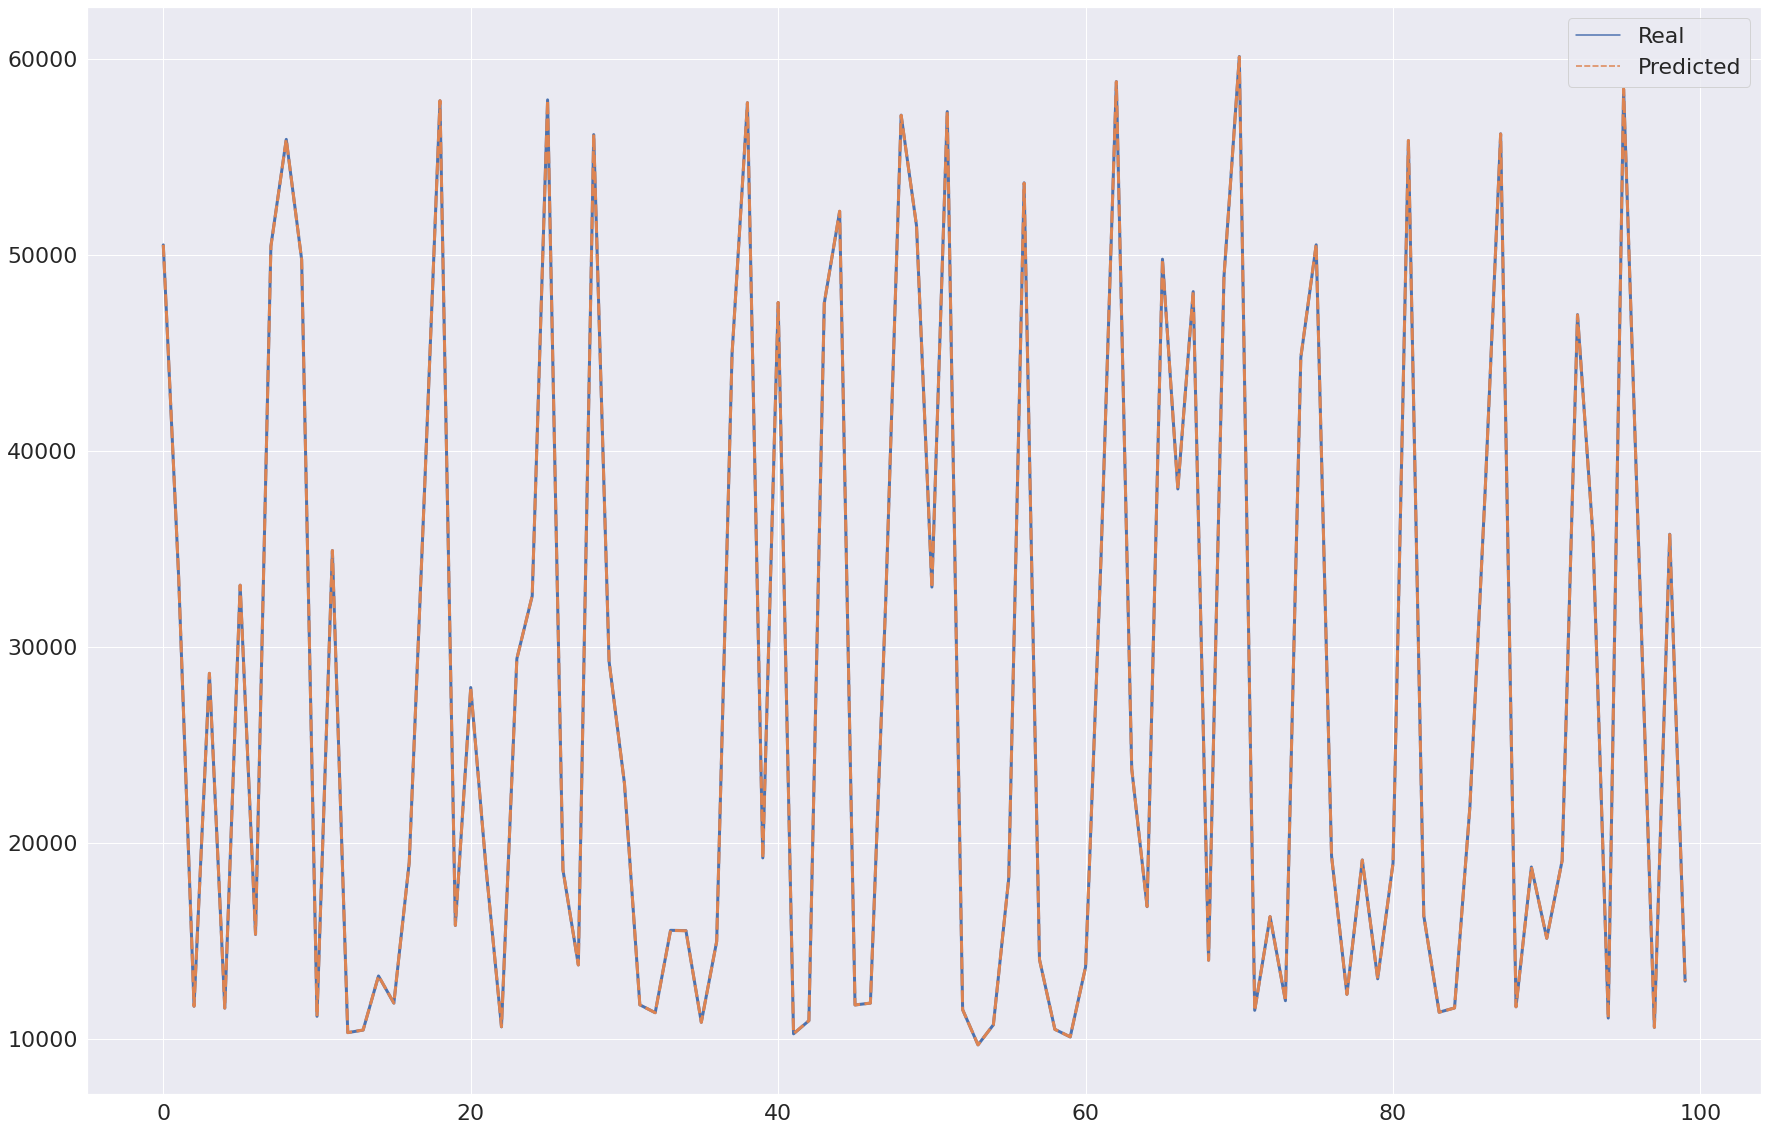

In [60]:
graph(y_test,yhat,100)

In [62]:
model.predict([[60445.81, 60459.67, 60393.853]])

array([60416.61572683])

In [63]:
x_test.values

array([[50579.63, 50579.63, 50516.37],
       [33637.36, 33637.36, 33549.12],
       [11652.32, 11663.08, 11652.32],
       ...,
       [26980.73, 27067.42, 26980.73],
       [12925.49, 12925.49, 12925.49],
       [52329.65, 52379.51, 52300.15]])

# decision-t regresszióval

In [6]:
data

,time,open,high,low,close,volume,dates
0,1505706180,3761.68,3775.45,3761.66,3775.32,1.281182,2017-09-18 03:43:00
1,1505706240,3769.29,3769.84,3768.89,3769.84,1.352133,2017-09-18 03:44:00
2,1505706300,3772.93,3773.01,3772.93,3773.01,0.196074,2017-09-18 03:45:00
3,1505706360,3772.94,3783.34,3772.91,3783.34,3.777993,2017-09-18 03:46:00
4,1505706420,3783.34,3787.10,3783.27,3786.70,0.138679,2017-09-18 03:47:00
...,...,...,...,...,...,...,...
357373,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,2021-03-30 23:56:00
357374,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,2021-03-30 23:57:00
357375,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,2021-03-30 23:58:00
357376,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,2021-03-30 23:59:00


In [3]:
%%time
#btc_data = pd.read_csv(r"/home/balazs/Desktop/szakdoga_info/btc_data.csv")
#data = btc_data.dropna()
data['MA5']=data['open'].rolling(window =5).mean()
data['EMA5']=data['open'].ewm(span=5,min_periods=0,adjust=False,ignore_na=False).mean()
data['CMA']=data.open.expanding().mean()
data['open_percentage_change']=data.open.pct_change()
data['close_percentage_change']=data.close.pct_change()
data['high_percentage_change']=data.high.pct_change()
data['low_percentage_change']=data.low.pct_change()
data['volume_percentage_change']=data.volume.pct_change()
lista=[]
for i in range(len(data.open_percentage_change.values)-5):
        value=data.open_percentage_change.values[i+1]+data.open_percentage_change.values[i+2]+data.open_percentage_change.values[i+3]+data.open_percentage_change.values[i+4]+data.open_percentage_change.values[i+5]
        lista.append(value)
for i in range(5):
    lista.append(0)
data['profit']=lista
buy_sell_list=[classificateWithNumbersThreeTarget(elem) for elem in data.profit]
data['decision']=buy_sell_list

CPU times: user 40.2 s, sys: 278 ms, total: 40.5 s
Wall time: 40.7 s


In [4]:
data=data.dropna()

In [5]:
data.drop(data.tail(5).index,inplace=True) # drop last n rows

In [6]:
X=data[['close_percentage_change','high_percentage_change','low_percentage_change']]
y=data[['decision']]
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X, y)
from imblearn.under_sampling import TomekLinks
TK = TomekLinks(sampling_strategy='majority')
X, y = TK.fit_resample(X, y)

In [11]:
X['decision']=y.values
X

,close_percentage_change,high_percentage_change,low_percentage_change,decision
0,0.000888,0.000994,0.002746,0
1,-0.000977,-0.001083,-0.002738,1
2,-0.002189,0.000722,0.000480,0
3,0.002718,-0.000003,-0.000472,-1
4,-0.003160,-0.003355,-0.000008,0
...,...,...,...,...
3496149,-0.000105,0.000361,-0.000027,1
3496150,-0.003023,-0.002617,-0.001598,1
3496151,0.001433,-0.000099,0.000543,1
3496152,-0.000382,-0.000186,-0.000049,1


In [14]:
x_train, x_test, y_train, y_test = train_test_split(
X[['close_percentage_change','high_percentage_change','low_percentage_change']],
X['decision'],
test_size = 0.3
)

In [39]:
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)

LinearRegression(normalize=True)

In [32]:
model.score(x_test, y_test)

0.1008946164581741

In [33]:
yhat=model.predict(x_test)
yhat

array([-0.24073302, -0.19589109,  0.02701737, ..., -0.05922961,
       -0.03429957, -0.00871677])

In [34]:
len(data)

1809713

In [35]:
def my_round(szam,erzekenyseg):
    if(szam<0 and szam<-(erzekenyseg)):
        return -1
    elif(szam>0 and szam>erzekenyseg):
        return 1
    else:
        return 0
        

In [36]:
joslat=[my_round(elem,0.10) for elem in yhat]

In [37]:
metrikak(y_test.values,joslat)

0.7974966796873137
nan


In [38]:
from sklearn.metrics import classification_report
classes = ['-1','0','1']
print(classification_report(y_test, joslat, target_names = classes, zero_division = 0))

              precision    recall  f1-score   support

          -1       0.58      0.38      0.46    330171
           0       0.45      0.65      0.53    359048
           1       0.55      0.48      0.51    359628

    accuracy                           0.51   1048847
   macro avg       0.53      0.50      0.50   1048847
weighted avg       0.52      0.51      0.50   1048847



In [45]:
x_test.values

array([[-1.72667366e-03,  1.18850351e-05, -1.02728139e-03],
       [-1.43749623e-03, -3.98088039e-04,  1.24070398e-03],
       [ 0.00000000e+00,  1.44810976e-03,  1.22937250e-03],
       ...,
       [-5.56191170e-04,  3.32918356e-05, -1.94047720e-04],
       [-3.95421829e-04,  3.57558140e-04, -3.96875586e-04],
       [-2.30442993e-04, -2.61219897e-05,  3.36170387e-05]])

In [46]:
model.predict([[1,2,3]])

array([139.60595557])

In [ ]:
graph(y_test.values,joslat,200)

In [40]:
import joblib
joblib.dump(model,'linearRegression.joblib')

['linearRegression.joblib']

# XGBregressor

In [53]:
x_train=x_train[:1000]
y_train=y_train[:1000]

In [55]:
x_test=x_test[:1000]
y_test=y_test[:1000]

In [47]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [54]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(3,1)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['mse'])

history = model.fit(x_train, y_train, epochs=150, batch_size=128)

Epoch 1/150
8/8 [==============================] - 0s 6ms/step - loss: -0.0842 - mse: 0.7154
Epoch 2/150
8/8 [==============================] - 0s 6ms/step - loss: -5.6719 - mse: 0.6500
Epoch 3/150
8/8 [==============================] - 0s 6ms/step - loss: -19.7804 - mse: 0.6500
Epoch 4/150
8/8 [==============================] - 0s 6ms/step - loss: -121.6512 - mse: 0.6500
Epoch 5/150
8/8 [==============================] - 0s 12ms/step - loss: -321.4327 - mse: 0.6500
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: -1473.4313 - mse: 0.6500
Epoch 7/150
8/8 [==============================] - 0s 10ms/step - loss: -3777.9236 - mse: 0.6500
Epoch 8/150
8/8 [==============================] - 0s 11ms/step - loss: -8515.3359 - mse: 0.6500
Epoch 9/150
8/8 [==============================] - 0s 15ms/step - loss: -22795.0195 - mse: 0.6500
Epoch 10/150
8/8 [==============================] - 0s 5ms/step - loss: -46440.7344 - mse: 0.6500
Epoch 11/150
8/8 [========================

In [56]:
yhat=model.predict(x_test)

In [57]:
yhat

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# DecisionTreeRegression

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [7]:
X

,close_percentage_change,high_percentage_change,low_percentage_change
0,0.000888,0.000994,0.002746
1,-0.000977,-0.001083,-0.002738
2,-0.002189,0.000722,0.000480
3,0.002718,-0.000003,-0.000472
4,-0.003160,-0.003355,-0.000008
...,...,...,...
3496359,0.002053,0.000672,0.000927
3496360,0.001106,0.000134,0.000266
3496361,0.000280,0.000046,-0.000375
3496362,0.002290,0.001391,-0.000471


In [8]:
y

,decision
0,0
1,1
2,0
3,-1
4,0
...,...
3496359,1
3496360,1
3496361,1
3496362,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
X[['close_percentage_change','high_percentage_change','low_percentage_change']],
X['decision'],
test_size = 0.3
)